In [1]:
import numpy as np
import sys
sys.path.append('./')
from vis_tools.engine import Detector

/data/dylu/anaconda3/envs/bdetr2d/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2
import matplotlib.pyplot as plt
def draw_boxes_on_image(image, gt_boxes, pred_boxes):
    """
    Draws ground truth and predicted boxes on the input image.

    Parameters:
        image (np.array): The input image as a NumPy array (e.g., read by cv2.imread).
        gt_boxes (list or np.array): List/array of ground truth boxes in [x_min, y_min, x_max, y_max] format.
        pred_boxes (list or np.array): List/array of predicted boxes in [x_min, y_min, x_max, y_max] format.
    
    Returns:
        np.array: A copy of the input image with drawn boxes.
    """
    # Make a copy of the image to avoid modifying the original
    image_copy = image.copy()
    
    # Draw ground truth boxes in green
    for box in gt_boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)
    
    # Draw predicted boxes in red
    for box in pred_boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color=(0, 0, 255), thickness=2)
    
    return image_copy

In [3]:
detector = Detector()

/data/dylu/anaconda3/envs/bdetr2d/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/dylu/anaconda3/envs/bdetr2d/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model 

Initializing Talk2EventDataset
load 7369 data from test split
missing 296 attributes


In [23]:
index = 5000
outputs, image_path, caption, gt_box, pred_boxes = detector.infrence(index)

In [24]:
img = cv2.imread(image_path)
# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H,W,_ = img.shape
c_x,c_y, w,h = gt_box[0]
b = [(c_x - 0.5 * w), (c_y - 0.5 * h),
        (c_x + 0.5 * w), (c_y + 0.5 * h)]
gt_box = [np.array(b) * np.array([W,H,W,H])]
image_copy = draw_boxes_on_image(img, gt_box, pred_boxes)

(-0.5, 639.5, 479.5, -0.5)

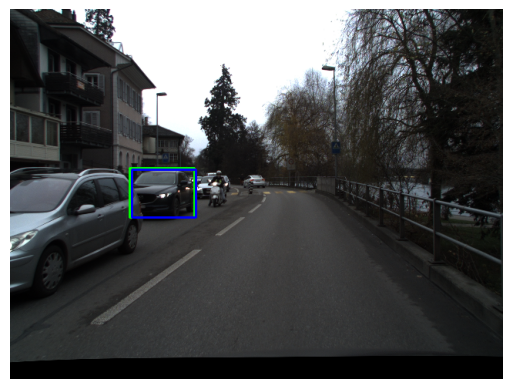

In [25]:
plt.imshow(image_copy)
plt.axis('off')

In [26]:
caption

'a black suv is parked stationary on the left side of the road , near the curb , in front of the viewer and slightly to the left , next to another silver car and close to a motorcyclist .. not mentioned'

In [34]:
pred_boxes

array([[494.77078, 174.02243, 551.8807 , 332.83542],
       [495.18256, 174.49689, 549.9398 , 333.33606],
       [493.60886, 174.14487, 545.2115 , 333.47293],
       [494.88095, 174.7248 , 549.65173, 332.7207 ],
       [491.3013 , 176.44139, 554.55493, 335.77313],
       [489.20746, 173.45627, 544.23615, 334.12634],
       [494.4783 , 172.93428, 554.1201 , 336.0618 ],
       [492.97076, 175.72798, 555.0269 , 335.61517],
       [494.4653 , 172.79906, 554.08887, 336.1272 ],
       [496.1452 , 173.1905 , 549.8431 , 333.2608 ],
       [495.89978, 173.73419, 547.2615 , 333.46738],
       [494.29395, 174.02477, 545.93726, 333.61987],
       [489.85522, 171.80554, 551.94904, 335.40158],
       [495.59106, 173.86266, 546.5427 , 333.95886],
       [492.73657, 174.22237, 544.3234 , 333.67468],
       [490.11948, 171.41698, 552.1421 , 335.4511 ]], dtype=float32)

In [35]:
gt_box

[array([491.00000858, 172.00000763, 548.00000668, 333.00001144])]